In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv("/content/gender_classification_v7.csv")
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [ ]:
Row, Col = data.shape
print(f' Dataset consist of {Row} rows and {Col} columns.')

 Dataset consist of 5001 rows and 8 columns.


In [ ]:
print("names of the columns:")
column_names = data.columns
for column in column_names:
    print(column)

names of the columns:
long_hair
forehead_width_cm
forehead_height_cm
nose_wide
nose_long
lips_thin
distance_nose_to_lip_long
gender


In [ ]:
data=pd.DataFrame(data)

In [ ]:
data["gender"].value_counts()

gender
Female    2501
Male      2500
Name: count, dtype: int64

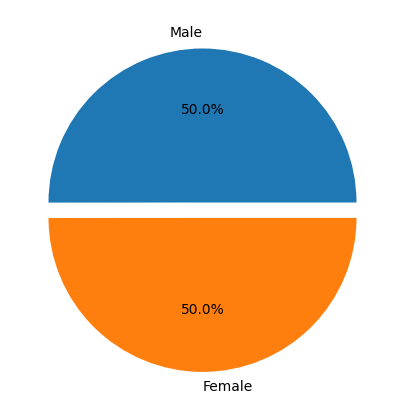

In [ ]:
plt.figure(figsize = (5,5))

labels = ["Male","Female"]
explode = [0, 0.1]

plt.pie(data.gender.value_counts(), labels = labels, explode = explode, autopct = '%1.1f%%')

plt.show()

<ipython-input-52-63248e7d5c96>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender',data=data, palette='magma')


<Axes: xlabel='gender', ylabel='count'>

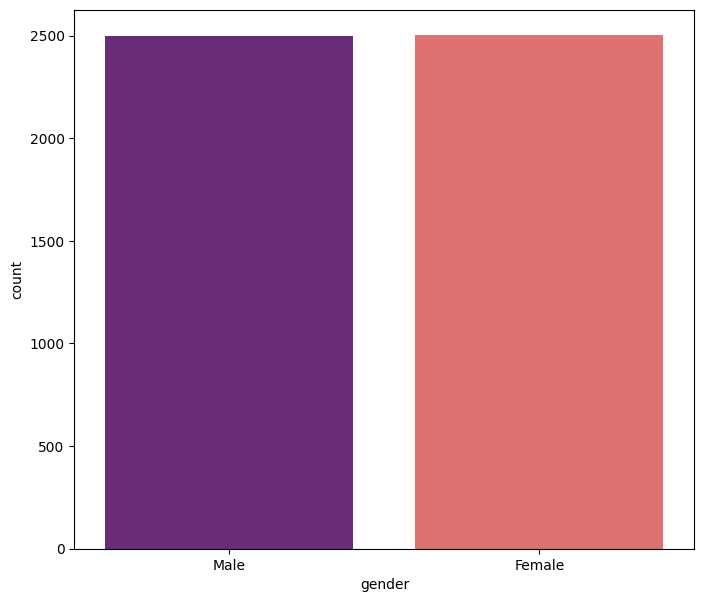

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(x='gender',data=data, palette='magma')

In [ ]:
data.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4996     True
4997     True
4998     True
4999     True
5000     True
Length: 5001, dtype: bool

In [ ]:
data.duplicated().sum()

1768

In [ ]:
data.drop_duplicates(inplace=True)

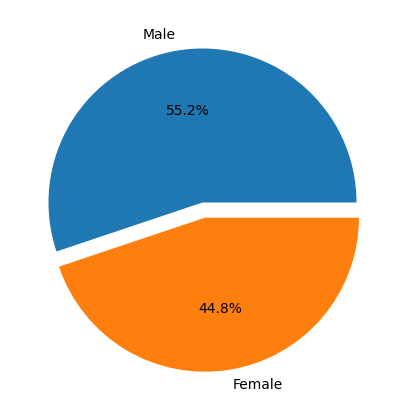

In [ ]:
plt.figure(figsize = (5,5))

labels = ["Male","Female"]
explode = [0, 0.1]

plt.pie(data.gender.value_counts(), labels = labels, explode = explode, autopct = '%1.1f%%')

plt.show()

In [ ]:
f=data[data.gender=="Female"]
m=data[data.gender=="Male"]

In [ ]:
data.gender=[1 if each=="Male" else 0 for each in data.gender]

In [ ]:
data["gender"].value_counts()

gender
1    1783
0    1450
Name: count, dtype: int64

<ipython-input-61-63248e7d5c96>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender',data=data, palette='magma')


<Axes: xlabel='gender', ylabel='count'>

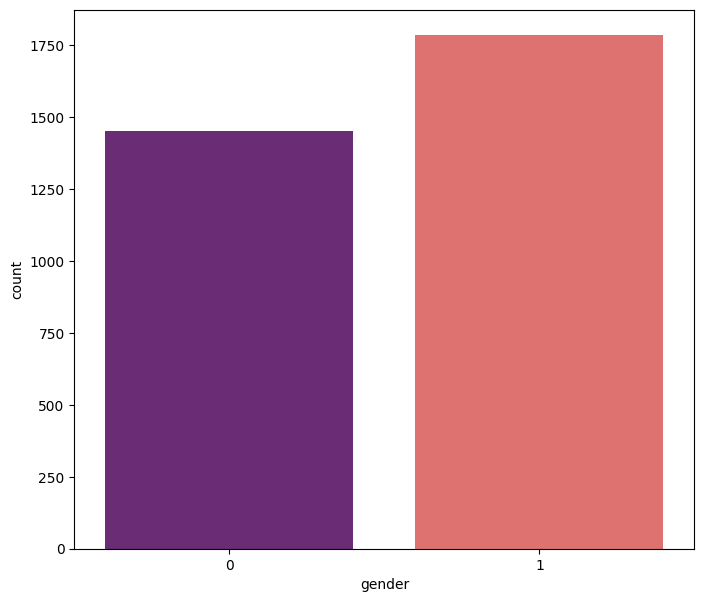

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(x='gender',data=data, palette='magma')

In [ ]:
l = []
for i in data.dtypes.index:
    if data[i].dtype == np.int64:
        l.append(i)
l

['long_hair',
 'nose_wide',
 'nose_long',
 'lips_thin',
 'distance_nose_to_lip_long',
 'gender']

<Figure size 800x2000 with 0 Axes>

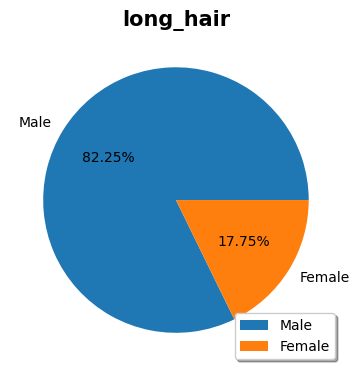

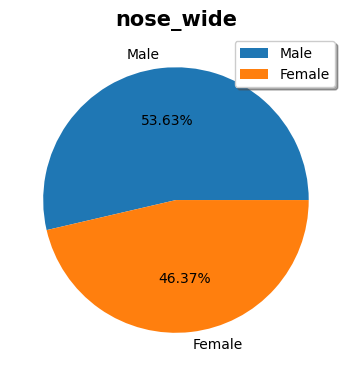

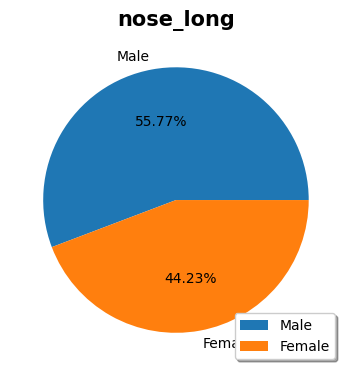

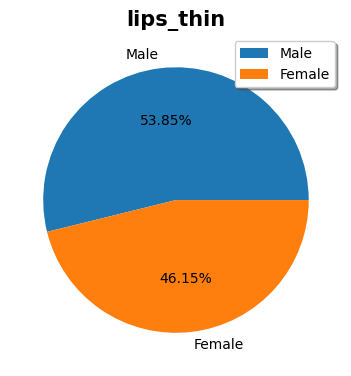

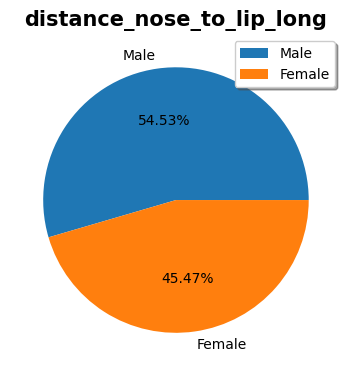

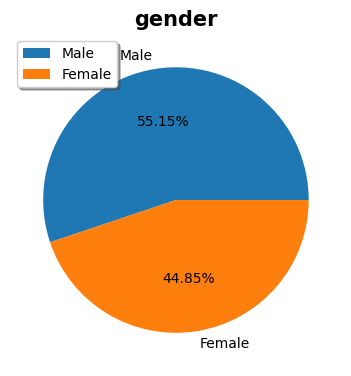

In [ ]:
plt.figure(figsize=(8,20))
i = 0
for x in l:
    i = i + 1
    plt.figure(figsize=(10,25))
    plt.subplot(5,2,i)
    plt.title(x,weight='bold',fontsize=15)
    d = {0:"Female",1:"Male"}
    plt.pie(data[x].value_counts().values,labels = data[x].value_counts().index.map(d),autopct="%.2f%%")
    plt.legend(shadow=True)
    plt.show()

In [ ]:

x=data.drop(["gender"],axis=1)
y=data.gender.values

In [ ]:
x

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4986,1,11.7,6.1,1,1,0,1
4990,1,12.6,5.7,0,0,1,0
4992,1,14.1,7.0,1,1,1,1
4993,1,11.6,5.9,0,0,0,1


In [ ]:
y

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("test accuracy: {} ".format(lr.fit(x_train, y_train).score(x_test, y_test)))
print("train accuracy: {} ".format(lr.fit(x_train, y_train).score(x_train, y_train)))

test accuracy: 0.9613601236476044 
train accuracy: 0.9481825212683681 


In [ ]:
y_pred=lr.predict(x_test)
y_true=y_test

In [ ]:
cm = confusion_matrix(y_test,y_pred)

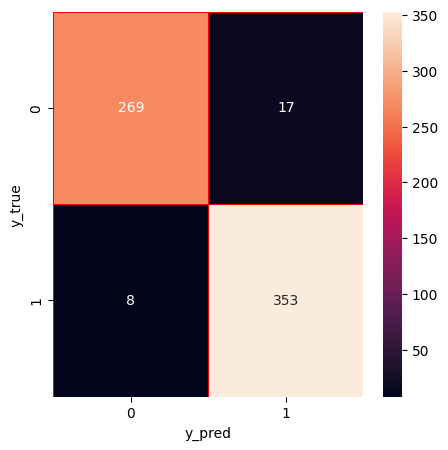

In [ ]:
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9613601236476044


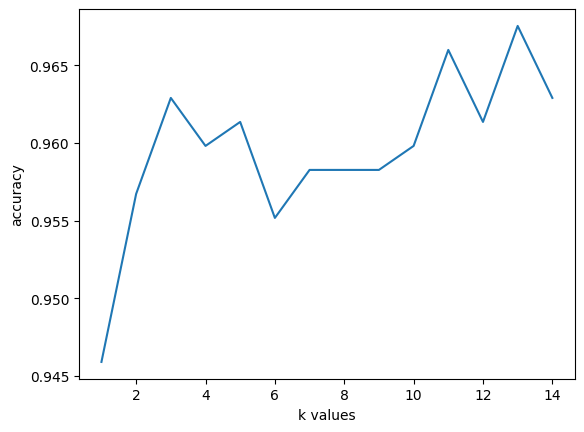

In [ ]:
score_list=[]
for each in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    knn2.predict(x_test)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9613601236476044


In [ ]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9613601236476044


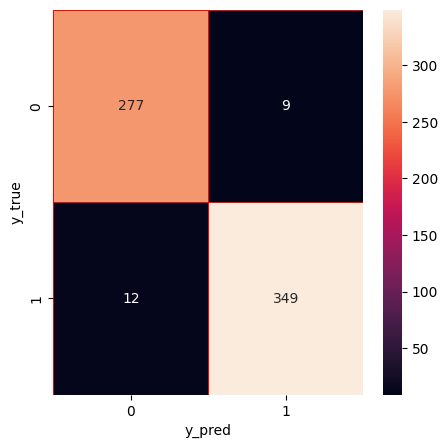

In [ ]:
y_pred=knn.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("print accuracy : ",svm.score(x_test,y_test))

print accuracy :  0.964451313755796


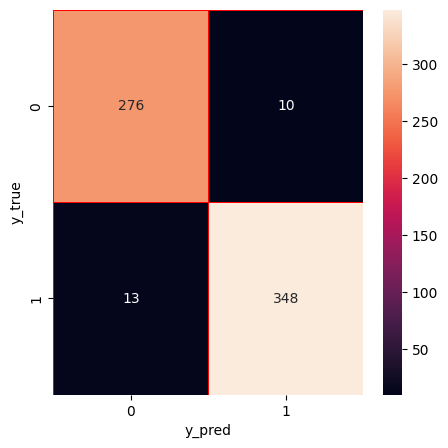

In [ ]:
y_pred=svm.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


Outliers: Series([], Name: forehead_width_cm, dtype: float64)


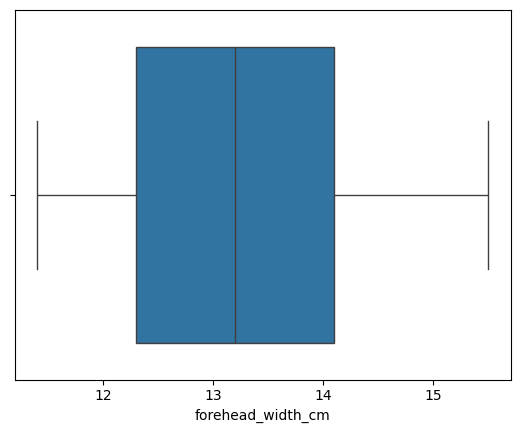

In [ ]:

#detect outliers:
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    return np.where(z_scores > threshold)

outliers_idx = detect_outliers_zscore(data['forehead_width_cm'])

print("Outliers:", data['forehead_width_cm'].iloc[outliers_idx])

# Visualize outliers using a boxplot
sns.boxplot(x=data['forehead_width_cm'])
plt.show()


Outliers: Series([], Name: forehead_height_cm, dtype: float64)


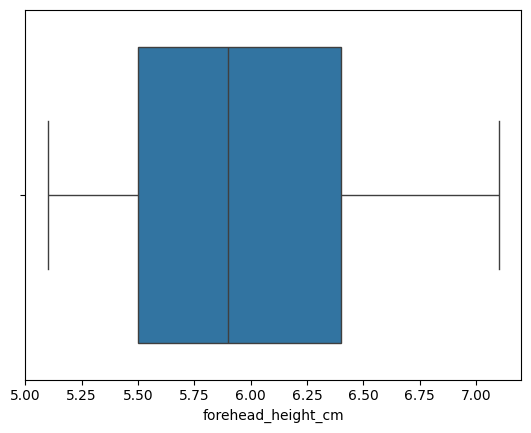

In [ ]:

#detect outliers:
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    return np.where(z_scores > threshold)

outliers_idx = detect_outliers_zscore(data['forehead_height_cm'])

print("Outliers:", data['forehead_height_cm'].iloc[outliers_idx])

# Visualize outliers using a boxplot
sns.boxplot(x=data['forehead_height_cm'])
plt.show()

## the best accuracy from svm classifier is **96.4**